In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import OpenWeatherMap for ease of data retrieval
import openweathermapy.core as owm

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
#Generate Cities list

# List for holding lat_lon and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat_lon combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Process of creating new data frame. 
owm_data = pd.DataFrame()
owm_data["City"] = ""
owm_data["Cloudy"] = ""
owm_data["Country"] = ""
owm_data["Date"] = "" 
owm_data["Humidity"] = ""
owm_data["Latitude"] = ""
owm_data["Longitude"] = ""
owm_data["Max Temp"] = ""
owm_data["Wind Speed"] = ""

# Print out the beginning of the retrieval notificaiton
print("Beginning Weather Data Retrieval")
print("-------------------------------")

# Loop through all of the cities within the cities array

for x in np.arange(len(cities)):
    
    print(f"Processing record {x}|{cities[x]}")
    try:
# Request the current weather from url of the current city via json
        current_weather_response = requests.get(f"{base_url}&appid={api_key}&q={cities[x]}&units=imperial").json()
# Place all of the column variables into the created dataframe
        owm_data.loc[x, "City"] = current_weather_response["name"]
        owm_data.loc[x, "Cloudy"] = current_weather_response["clouds"]["all"]            
        owm_data.loc[x, "Country"] = current_weather_response["sys"]["country"]
        owm_data.loc[x, "Date"] = current_weather_response["dt"]
        owm_data.loc[x, "Humidity"] = current_weather_response["main"]["humidity"]
        owm_data.loc[x, "Latitude"] = current_weather_response["coord"]["lat"]
        owm_data.loc[x, "Longitude"] = current_weather_response["coord"]["lon"]
        owm_data.loc[x, "Max Temp"] = current_weather_response["main"]["temp_max"]
        owm_data.loc[x, "Wind Speed"] = current_weather_response["wind"]["speed"]
                               
    except(KeyError, IndexError):
        print("Unable to locate city. Moving to the next city")

print("Weather Data Retrieval Complete")

Beginning Weather Data Retrieval
-------------------------------
Processing record 0|ushuaia
Processing record 1|ribeira grande
Processing record 2|albany
Processing record 3|punta arenas
Processing record 4|lagoa
Processing record 5|atuona
Processing record 6|koumac
Processing record 7|esperance
Processing record 8|rikitea
Processing record 9|valenca
Processing record 10|glossa
Processing record 11|talnakh
Processing record 12|castro
Processing record 13|sentyabrskiy
Unable to locate city. Moving to the next city
Processing record 14|kazalinsk
Unable to locate city. Moving to the next city
Processing record 15|hermanus
Processing record 16|cachoeirinha
Processing record 17|chiang khong
Processing record 18|bluff
Processing record 19|makakilo city
Processing record 20|taolanaro
Unable to locate city. Moving to the next city
Processing record 21|guane
Processing record 22|codrington
Processing record 23|nikolskoye
Processing record 24|prince rupert
Processing record 25|illoqqortoormiut


Processing record 228|nome
Processing record 229|pevek
Processing record 230|nizhneyansk
Unable to locate city. Moving to the next city
Processing record 231|podosinovets
Processing record 232|saint-joseph
Processing record 233|barentsburg
Unable to locate city. Moving to the next city
Processing record 234|narsaq
Processing record 235|north platte
Processing record 236|tungkang
Unable to locate city. Moving to the next city
Processing record 237|isiolo
Processing record 238|conakry
Processing record 239|san quintin
Processing record 240|port elizabeth
Processing record 241|beringovskiy
Processing record 242|hasaki
Processing record 243|pangai
Processing record 244|coihaique
Processing record 245|smirnykh
Processing record 246|eldorado
Processing record 247|caborca
Processing record 248|broken hill
Processing record 249|florianopolis
Processing record 250|saleaula
Unable to locate city. Moving to the next city
Processing record 251|suez
Processing record 252|santa cecilia
Processing re

Processing record 449|saint-leu
Processing record 450|sesheke
Processing record 451|chabahar
Processing record 452|derbent
Processing record 453|upata
Processing record 454|novyy urgal
Processing record 455|alice springs
Processing record 456|port macquarie
Processing record 457|meschede
Processing record 458|takoradi
Processing record 459|olafsvik
Unable to locate city. Moving to the next city
Processing record 460|araouane
Processing record 461|roma
Processing record 462|antalaha
Processing record 463|knysna
Processing record 464|prachuap khiri khan
Processing record 465|ilorin
Processing record 466|morgan city
Processing record 467|dalvik
Processing record 468|qingdao
Processing record 469|grants pass
Processing record 470|ellensburg
Processing record 471|gongzhuling
Processing record 472|santa cruz cabralia
Processing record 473|gushikawa
Processing record 474|hualmay
Processing record 475|udaipura
Processing record 476|bamiantong
Processing record 477|port blair
Processing record 

### Convert Raw Data to DataFrame
-Export the city data into a .csv.
- Display the DataFrame

In [6]:
#Remove the rows with no data detected  
# to create new refined data frame: owm_city_data_df
owm_city_data_df = owm_data.dropna()

In [7]:
# Counts for each column
owm_city_data_df.count()

City          569
Cloudy        569
Country       569
Date          569
Humidity      569
Latitude      569
Longitude     569
Max Temp      569
Wind Speed    569
dtype: int64

##### Save to csv file
- output_data_file = "output_data/cities.csv"
- Display data frame for preview

In [8]:
owm_city_data_df.to_csv("output_data/cities.csv")
owm_city_data_df.head(10)

,City,Cloudy,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Ushuaia,87,AR,1567741529,90,-54.81,-68.31,27.32,1.77
1,Ribeira Grande,100,PT,1567741529,81,38.52,-28.7,70.61,13.76
2,Albany,40,US,1567741329,87,42.65,-73.75,57.99,3.18
3,Punta Arenas,20,CL,1567741530,92,-53.16,-70.91,30.2,6.93
4,Lagoa,0,PT,1567741530,73,37.14,-8.45,73.4,6.93
5,Atuona,18,PF,1567741531,67,-9.8,-139.03,79.43,6.24
6,Koumac,0,NC,1567741531,60,-20.56,164.28,69.84,5.32
7,Esperance,0,AU,1567741531,50,-33.86,121.89,55.4,8.05
8,Rikitea,100,PF,1567741532,70,-23.12,-134.97,68.34,13.87
9,Valenca,67,BR,1567741532,99,-13.37,-39.07,66.24,2.53


###### Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs

## Latitude vs. Temperature Plot

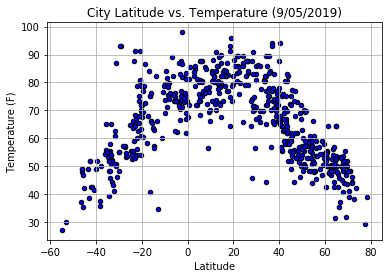

In [27]:
plt.scatter(owm_city_data_df["Latitude"],
            owm_city_data_df["Max Temp"],
            marker="o",
            color="blue",
            s=20,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Temperature (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

plt.savefig("output_data/Lat_vs_Temp.png")
plt.show()

### Latitude vs. Humidity Plot

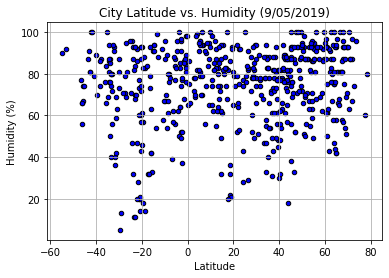

In [26]:
plt.scatter(owm_city_data_df["Latitude"],
            owm_city_data_df["Humidity"],
            marker="o",
            color="blue",
            s=20,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Humidity (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

### Latitude vs. Cloud Coverage Plot


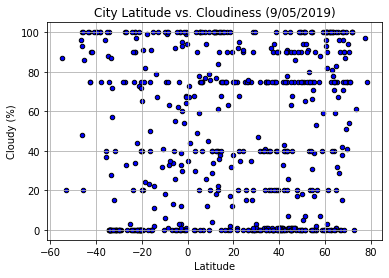

In [25]:
plt.scatter(owm_city_data_df["Latitude"],
            owm_city_data_df["Cloudy"],
            marker="o",
            color="blue",
            s=20,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Cloudiness (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudy (%)")
plt.grid()

plt.savefig("output_data/Lat_vs_cloudy.png")
plt.show()

### Latitude vs. Wind Speed Plot

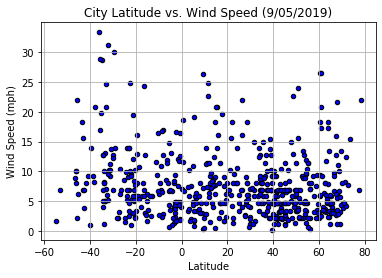

In [24]:
plt.scatter(owm_city_data_df["Latitude"],
            owm_city_data_df["Wind Speed"],
            marker="o",
            color="blue",
            s=20,                    
            edgecolors="k",                         
            linewidth=1.0)  
# Scatter plot Labeling
plt.title("City Latitude vs. Wind Speed (9/05/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("output_data/Lat_vs_wind_speed.png")
plt.show()